In [1]:
# ─────────────────────────────────────
# 📥 Load and Combine Reviewed CSVs
# ─────────────────────────────────────

import pandas as pd

# Define file paths (adjust if needed)
paths = {
    "troubles": "../data/chaos/troubles/troubles_manual_review.csv",
    "pieter": "../data/middle/pieter/pieter_manual_review.csv",
    "yerik": "../data/ubuntu/yerik/yerik_manual_review.csv"
}

# Load each file and tag with creator name
dfs = []
for creator, path in paths.items():
    df = pd.read_csv(path)
    df["creator"] = creator
    dfs.append(df)

# Combine into one DataFrame
df_all = pd.concat(dfs, ignore_index=True)

# Preview
print(f"✅ Combined dataset with {len(df_all)} rows")
#df_all.head()


✅ Combined dataset with 450 rows


In [2]:
# 📊 Quick Comparison: GPT vs Human Labels

import pandas as pd

# Load reviewed CSVs — make sure these paths or uploaded files exist
troubles = pd.read_csv("../data/chaos/troubles/troubles_manual_review.csv")
pieter = pd.read_csv("../data/middle/pieter/pieter_manual_review.csv")  # update if file uploaded
yerik = pd.read_csv("../data/ubuntu/yerik/yerik_manual_review.csv")   # update if file uploaded

# Add creator names
troubles["creator"] = "troubles"
pieter["creator"] = "pieter"
yerik["creator"] = "yerik"

# Combine all
df_all = pd.concat([troubles, pieter, yerik], ignore_index=True)

# Sanity check for label columns
df_all = df_all.rename(columns=lambda x: x.strip())  # remove whitespace issues
assert "manual_label" in df_all.columns
assert "manual_label_new" in df_all.columns

# Compare GPT vs Manual labels
label_compare = df_all.groupby(["manual_label", "manual_label_new"]).size().reset_index(name="count")
label_compare = label_compare.sort_values("count", ascending=False)

# Show
label_compare


,manual_label,manual_label_new,count
9,Unclear,Middle,209
7,Ubuntu,Ubuntu,67
6,Ubuntu,Middle,51
3,Middle,Middle,50
10,Unclear,Ubuntu,18
8,Unclear,Chaos,14
1,Chaos,Middle,13
2,Middle,Chaos,12
0,Chaos,Chaos,6
4,Middle,Ubuntu,6


In [3]:
# df_all[df_all["manual_label_new"] == "Unclear"]

In [4]:
import pandas as pd

# Step 1: Rename columns for clarity
df_all_renamed = df_all.rename(columns={
    "manual_label": "GPT_Label",
    "manual_label_new": "Human_Label"
})

# Step 2: Create confusion matrix
conf_matrix = pd.crosstab(df_all_renamed["GPT_Label"], df_all_renamed["Human_Label"])

# Step 3: Reorder (optional)
labels = ["Ubuntu", "Chaos", "Middle", "Unclear"]
conf_matrix = conf_matrix.reindex(index=labels, columns=labels, fill_value=0)

# Step 4: Style the table
styled = (
    conf_matrix.style
    .set_caption("🧠 GPT vs ✅ Human Moral Label — Confusion Matrix")
    .set_table_styles(
        [{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}]
    )
    .background_gradient(axis=None, cmap="Blues")
    .format("{:.0f}")
    .set_properties(**{"text-align": "center"})
)

# Display the styled confusion matrix
styled


Human_Label,Ubuntu,Chaos,Middle,Unclear
GPT_Label,,,,
Ubuntu,67,4,51,0
Chaos,0,6,13,0
Middle,6,12,50,0
Unclear,18,14,209,0


## 🧠 Section 1 – Label Agreement Metrics

This section evaluates how well GPT's moral labels align with human judgments across all reviewed comments from the creators `troubles`, `pieter`, and `yerik`.

We calculate standard agreement metrics:
- **Overall Accuracy**: Percentage of exact matches between GPT and human labels.
- **Per-class Precision, Recall, F1-Score**: How well each moral category is predicted.
- **Macro-Average**: Treats all classes equally regardless of size.
- **Weighted-Average**: Accounts for class imbalance.

These metrics give us a clearer sense of GPT's strengths and blindspots in interpreting moral tone in South African TikTok comments.


In [5]:
from sklearn.metrics import classification_report, accuracy_score

# 🧹 Clean columns
df_all["GPT_Label"] = df_all["manual_label"].str.strip()
df_all["Human_Label"] = df_all["manual_label_new"].str.strip()

# 🎯 Ensure matching labels
labels_order = ["Ubuntu", "Chaos", "Middle"]

# ✅ Accuracy
overall_accuracy = accuracy_score(df_all["Human_Label"], df_all["GPT_Label"])
print(f"🔍 Overall Accuracy: {overall_accuracy:.2%}\n")

# 📊 Full Classification Report
print("📋 Classification Report (GPT vs Human):")
print(classification_report(
    df_all["Human_Label"],
    df_all["GPT_Label"],
    labels=labels_order,
    target_names=labels_order,
    zero_division=0
))


🔍 Overall Accuracy: 27.33%

📋 Classification Report (GPT vs Human):
              precision    recall  f1-score   support

      Ubuntu       0.55      0.74      0.63        91
       Chaos       0.32      0.17      0.22        36
      Middle       0.74      0.15      0.26       323

   micro avg       0.59      0.27      0.37       450
   macro avg       0.53      0.35      0.37       450
weighted avg       0.66      0.27      0.33       450



In [6]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


/var/folders/1s/3kz3bgtn053b1pbphdblf1h40000gn/T/ipykernel_56867/150848749.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_all, x='manual_label_new', y='sentiment', palette='Set2', jitter=True, alpha=0.6, size=6)
/var/folders/1s/3kz3bgtn053b1pbphdblf1h40000gn/T/ipykernel_56867/150848749.py:32: UserWarning: Glyph 129517 (\N{COMPASS}) missing from current font.
  plt.tight_layout()
/Users/joandrimeyer/miniforge3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129517 (\N{COMPASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


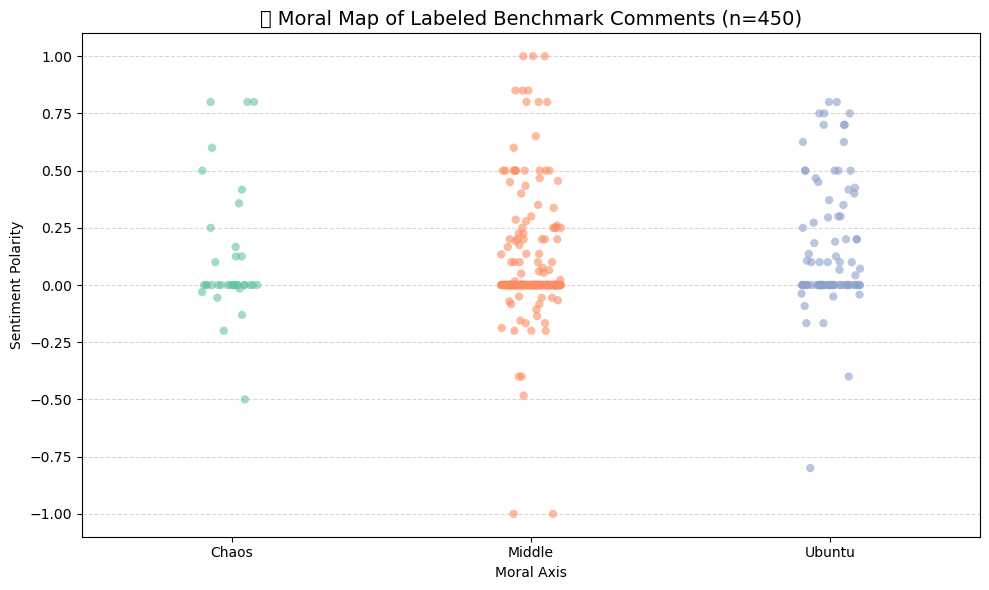

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# Adjust file paths as needed
paths = {
    "troubles": "../data/chaos/troubles/troubles_manual_review.csv",
    "pieter": "../data/middle/pieter/pieter_manual_review.csv",
    "yerik": "../data/ubuntu/yerik/yerik_manual_review.csv"
}

# Load and merge
dfs = []
for path in paths.values():
    df = pd.read_csv(path)
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)
df_all.columns = df_all.columns.str.strip()

# Sentiment on translated_text
df_all['sentiment'] = df_all['translated_text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot moral categories only
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_all, x='manual_label_new', y='sentiment', palette='Set2', jitter=True, alpha=0.6, size=6)
plt.title("🧭 Moral Map of Labeled Benchmark Comments (n=450)", fontsize=14)
plt.xlabel("Moral Axis")
plt.ylabel("Sentiment Polarity")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


🔢 Count of Human-Labeled Comments per Moral Category:
 -  Chaos: 36 comments
 - Middle: 323 comments
 - Ubuntu: 91 comments


/var/folders/1s/3kz3bgtn053b1pbphdblf1h40000gn/T/ipykernel_56867/445506234.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


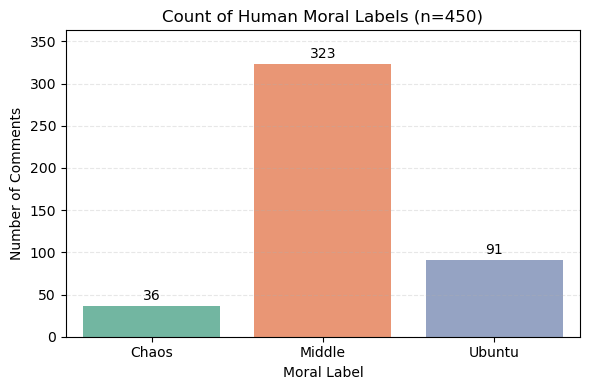

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load reviewed CSVs
troubles = pd.read_csv("../data/chaos/troubles/troubles_manual_review.csv")
pieter = pd.read_csv("../data/middle/pieter/pieter_manual_review.csv")
yerik = pd.read_csv("../data/ubuntu/yerik/yerik_manual_review.csv")

# 🧹 Combine and clean
df_all = pd.concat([troubles, pieter, yerik], ignore_index=True)
df_all.columns = df_all.columns.str.strip()

# 📊 Count values
label_order = ["Chaos", "Middle", "Ubuntu"]
label_counts = df_all["manual_label_new"].value_counts().reindex(label_order).fillna(0).astype(int)

# 📋 Print summary
print("🔢 Count of Human-Labeled Comments per Moral Category:")
for label, count in label_counts.items():
    print(f" - {label:>6}: {count} comments")

# 📈 Plot
plt.figure(figsize=(6, 4))
barplot = sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    palette=sns.color_palette("Set2", n_colors=3)  # handle palette correctly
)

# Annotate each bar
for i, count in enumerate(label_counts.values):
    barplot.text(i, count + 4, str(count), ha="center", va="bottom", fontsize=10)

plt.title("Count of Human Moral Labels (n=450)")
plt.ylabel("Number of Comments")
plt.xlabel("Moral Label")
plt.ylim(0, max(label_counts.values) + 40)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()



The bar chart above shows the count of manually labeled comments by moral category across a benchmark dataset of 450 samples (150 per creator). The moral labels were annotated using a three-way classification: Chaos, Middle, and Ubuntu.

Middle dominates with 323 comments, suggesting that a large portion of online discourse defies easy moral polarization. These are the complex, nuanced, or contradictory utterances that lie between collective Ubuntu values and algorithm-fueled chaos.

Ubuntu appears in 91 comments, showing that despite the harshness or absurdity found on social media, traces of community care and mutual support are still visible. Maybe people are caring, after all.

Chaos is present in only 36 comments, though this may not reflect reality—chaotic content may be more obvious but less frequent in structured comment threads, or perhaps we are more sensitive to interpreting subtle humanity in strange places.

#### Why This Dataset Can’t Be Used for Model Training (Yet)

While this benchmark gives us a valuable look into moral labeling patterns, it’s not suitable for supervised machine learning in its current form:

Class imbalance is extreme: With over 70% of comments labeled as Middle, any classifier would be biased and underexposed to the edges of the moral spectrum (Ubuntu and Chaos).

Sample size is too small: 450 labeled rows is helpful for evaluation and qualitative insight, but far from enough to train a reliable model.

Possible annotation noise: Especially with ambiguous or code-switched content, there may be inconsistency in label interpretation—even in our own manual annotations.

#### What’s Next

To move forward, we will begin crafting a balanced dataset— by labeling more comments from underrepresented categories. We'll also explore how these human moral categories correlate with emotion, sentiment, and topic clusters in the larger, unlabeled corpus.

In [18]:
import pandas as pd

# === Load reviewed manual files ===
troubles = pd.read_csv("../data/chaos/troubles/troubles_manual_review.csv")
pieter = pd.read_csv("../data/middle/pieter/pieter_manual_review.csv")
yerik = pd.read_csv("../data/ubuntu/yerik/yerik_manual_review.csv")

# === Tag creators ===
troubles["creator"] = "troubles"
pieter["creator"] = "pieter"
yerik["creator"] = "yerik"

# === Combine ===
df_all = pd.concat([troubles, pieter, yerik], ignore_index=True)

# === Clean columns ===
df_all.columns = df_all.columns.str.strip()

# === Drop GPT label column ===
df_benchmark = df_all.drop(columns=["manual_label"], errors="ignore")  # keep only your labels

# === Sanity check: must have your final labels only ===
assert "manual_label_new" in df_benchmark.columns

# === Optional: save to new benchmark file ===
df_benchmark.to_csv("benchmark_manual_labeled.csv", index=False)

# ✅ Done
print(f"✅ Clean benchmark created with {len(df_benchmark)} rows and columns: {df_benchmark.columns.tolist()}")
#df_benchmark.head()


✅ Clean benchmark created with 450 rows and columns: ['video_id', 'comment_id', 'reply_to_comment_id', 'original_text', 'translated_text', 'emoji_only', 'reply_to_original_text', 'reply_to_id', 'replied_to_translated', 'emoji_count', 'text_length', 'thread_depth', 'creator_category', 'manual_label_new', 'video_moral_label', 'creator']
